# Решение заданий к уроку 2

__1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.__


### Решение

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
# построим функцию градиентного спуска с сохранением поведения среднеквадратичного отклонения при каждой итерации
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errs=[]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        errs.append(calc_mse(y, y_pred))
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
    return W,errs

In [4]:
# построим функцию стохастического градиентного спуска с сохранением поведения среднеквадратичного отклонения при каждой итерации
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    errs = []
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        errs.append(calc_mse(y_tmp, y_pred_tmp))
    return W,errs

In [5]:
# Импортируем функцию для генерации датасета
from sklearn.datasets import make_regression
from matplotlib import pyplot
X, y = make_regression(n_samples=100, n_features=5, noise=0.1)
X.shape,y.shape


((100, 5), (100,))

In [6]:
# сгенерим датасет и построим обучим линейную модель при помощи градиентного и стохастического градиентного спуска
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)
w,e1 = eval_model(X.T, y, iterations=1000, alpha=1e-2)
w,e2 = eval_sgd_model(X.T, y, iterations=1000, qty_in_batch=1, alpha=1e-2)
print(e1[-1],e2[-1])

0.009344070240918012 0.07348084808439412


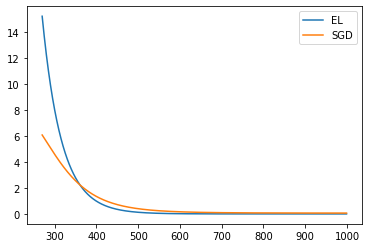

In [7]:
# Построим график
k = 270
x = [i for i in range(k,len(e1)) ]
plt.plot(x,e1[k:],label ='EL')
plt.plot(x,e2[k:],label ='SGD')
plt.legend(loc="best")

Можно увидеть что скорость обучения стохастического градиентного спуска выше, но пример после 500 итераций они сходятся

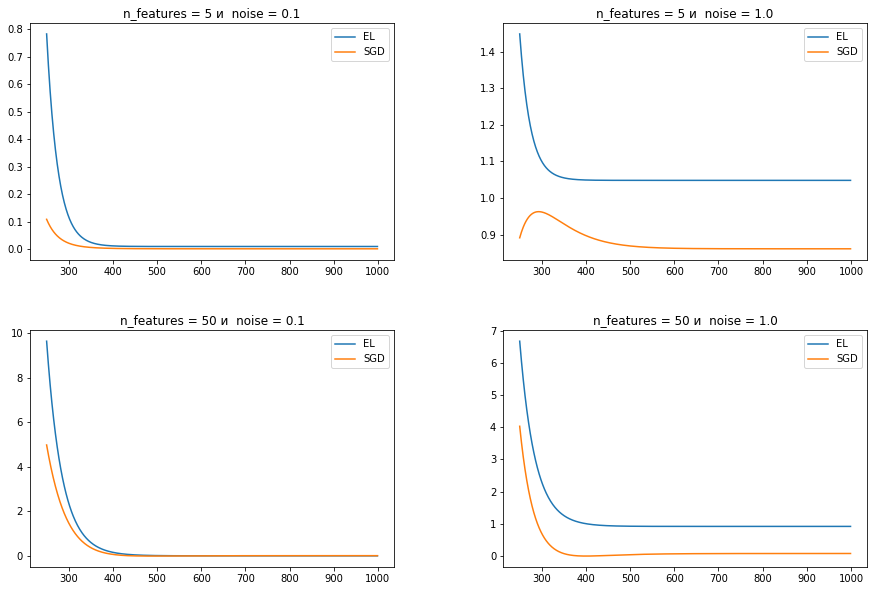

In [8]:
# Построим графики для разного количества параметров и разного уровня шума на данных
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 10)
fig.subplots_adjust(wspace=0.3, hspace = 0.3)
n = 1000
k = 250
x = [i for i in range(k,n) ]
comb = [(0,0),(0,1),(1,0),(1,1)]
noises = [0.1, 1., 0.1, 1. ]
n_f = [5, 5, 50, 50]
for j in range(4):
    X, y = make_regression(n_samples=1000, n_features = n_f[j], noise= noises[j])
    w,e1 = eval_model(X.T, y, iterations=n, alpha=1e-2)
    w,e2 = eval_sgd_model(X.T, y, iterations=n, qty_in_batch=1, alpha=1e-2)
    ax[comb[j]].plot(x,e1[k:],label ='EL')
    ax[comb[j]].plot(x,e2[k:],label ='SGD')
    ax[comb[j]].set_title(f'n_features = {n_f[j]} и  noise = {noises[j]}')
    ax[comb[j]].legend(loc="best")

Можно сделать вывод что в целом скорость обучения на стохастической модели быстрее, при этом на хороших данных  они обычно сходятся, а данных с большим шумом часто можем получить лучше оценку при стохастическом градиентном спуске.

__2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.__

In [9]:
# добавим L2 регуляризацию в обе функции
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errs = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        errs.append(calc_mse(y, y_pred))
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W, errs

In [10]:
def eval_sgd_model_reg2(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    errs = []
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)+ lambda_ * W))
        errs.append(calc_mse(y_tmp, y_pred_tmp))
    return W,errs

In [11]:

X, y = make_regression(n_samples=1000, n_features = 5, noise=1.)
w,e1 = eval_model(X.T, y, iterations=1000, alpha=1e-2)
w,e2 = eval_sgd_model(X.T, y, iterations=1000, qty_in_batch=1, alpha=1e-2)
w,e3 = eval_model_reg2(X.T, y, iterations=1000, alpha=1e-2, lambda_=1e-2)
w,e4 = eval_sgd_model_reg2(X.T, y, iterations=1000, alpha=1e-2, lambda_=1e-4)

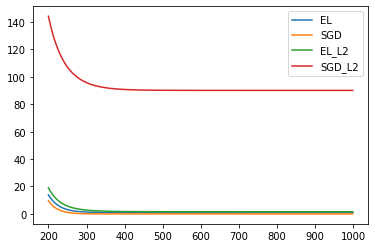

In [12]:
k = 200
x = [i for i in range(k,len(e1)) ]
plt.plot(x,e1[k:],label ='EL')
plt.plot(x,e2[k:],label ='SGD')
plt.plot(x,e3[k:],label ='EL_L2')
plt.plot(x,e4[k:],label ='SGD_L2')
plt.legend(loc="best")

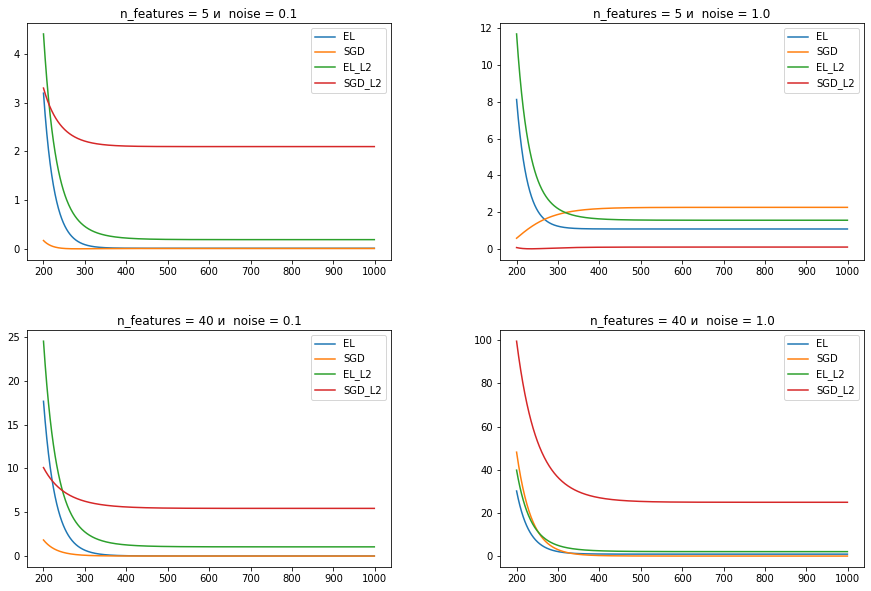

In [14]:
# Построим графики для разного количества параметров и разного уровня шума на данных
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 10)
fig.subplots_adjust(wspace=0.3, hspace = 0.3)
n = 1000
k = 200
x = [i for i in range(k,n) ]
comb = [(0,0),(0,1),(1,0),(1,1)]
noises = [0.1, 1., 0.1, 1. ]
n_f = [5, 5, 40, 40]
for j in range(4):
    X, y = make_regression(n_samples=1000, n_features = n_f[j], noise= noises[j])
    w,e1 = eval_model(X.T, y, iterations=n, alpha=1e-2)
    w,e2 = eval_sgd_model(X.T, y, iterations=n, qty_in_batch=1, alpha=1e-2)
    w,e3 = eval_model_reg2(X.T, y, iterations=n, alpha=1e-2, lambda_=1e-2)
    w,e4 = eval_sgd_model_reg2(X.T, y, iterations=n, alpha=1e-2, lambda_=1e-4)
    ax[comb[j]].plot(x,e1[k:],label ='EL')
    ax[comb[j]].plot(x,e2[k:],label ='SGD')
    ax[comb[j]].plot(x,e3[k:],label ='EL_L2')
    ax[comb[j]].plot(x,e4[k:],label ='SGD_L2')
    ax[comb[j]].set_title(f'n_features = {n_f[j]} и  noise = {noises[j]}')
    ax[comb[j]].legend(loc="best")

Можно заметить что на данных с небольшим шумом добавление L2 регуляризации только ухудшает картину, а вот на данных с большим шумом и при небольшом количестве параметров L2 регуляризация может улучшить и скорость сходимости модели стохастического градиентного спуска 
Вообще говоря в зависимости от сгенерированного датасета особенно при большем шуме , графики скорости обучения могут меняться